<a href="https://colab.research.google.com/github/lukaszplust/Metody_Numeryczne/blob/main/MACD_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
np.__version__

'1.21.6'

In [2]:
def fetch_financial_data(company='AAPL'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

In [3]:
apple = fetch_financial_data('AAPL')
apple = apple.reset_index()
df = pd.DataFrame(apple)
df = df.iloc[:1000]
values = df.Close
data = df.Date

In [4]:
data

0     2023-01-12
1     2023-01-11
2     2023-01-10
3     2023-01-09
4     2023-01-06
         ...    
995   2019-01-31
996   2019-01-30
997   2019-01-29
998   2019-01-28
999   2019-01-25
Name: Date, Length: 1000, dtype: datetime64[ns]

In [5]:
values

0      133.4100
1      133.4900
2      130.7300
3      130.1500
4      129.6200
         ...   
995     40.1625
996     39.8714
997     37.3252
998     37.7129
999     38.0679
Name: Close, Length: 1000, dtype: float64

EMA

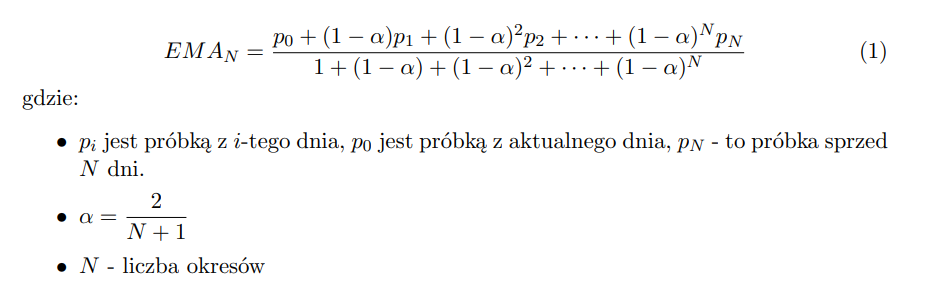

In [7]:
def Exponential_Moving_Average(periods, values):
  alfa = 2/(periods+1)
  result_ema = []

  for i in range(periods, len(values)):
    numerator = 0 #licznik
    denominator = 0#mianownik
    for j in range(periods+1):
      numerator = numerator + (1-alfa)**j * values[i-j]
      denominator = denominator +(1-alfa)**j
    result_ema.append(numerator/denominator)
  return result_ema

In [8]:
ema_12 = Exponential_Moving_Average(12,values)
ema_26 = Exponential_Moving_Average(26,values)

In [9]:
len(ema_12)

988

In [11]:
len(ema_26)

974

MACD

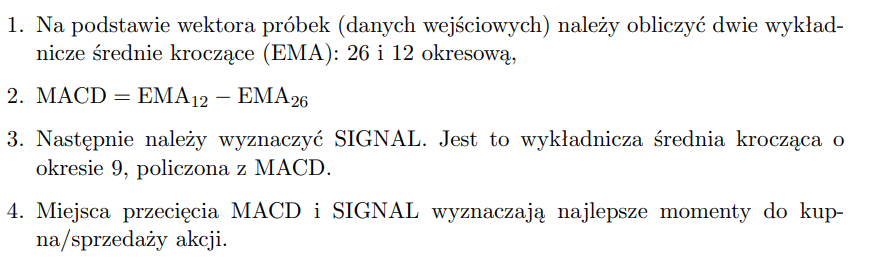

In [16]:
def Moving_Average_Convergence_Divergence(ema_12,ema_26):
  result_macd = []
  n=len(ema_26)#974
  #od i do 974 dodawaj ema_12[14]-ema_26[0], ema_12[15] - ema_26[10] itp...]
  #dodaje 14 poniewaz ema_12 jest dłuższa o 14
  for i in range(n):
    result_macd.append(ema_12[i+14] - ema_26[i])
  return result_macd

MACD

In [17]:
result_macd = Moving_Average_Convergence_Divergence(ema_12,ema_26)

In [18]:
macd = pd.DataFrame(result_macd)
macd = pd.melt(macd)
macd.reset_index()
macd.drop('variable', axis=1, inplace=True)
df['macd'] = macd

SIGNAL

In [19]:
signal = Exponential_Moving_Average(9, result_macd)

In [20]:
signal = pd.DataFrame(signal)
signal = pd.melt(signal)
signal.drop('variable', axis=1, inplace=True)
df['signal'] = signal

In [21]:
df

Date      Open      High       Low     Close        Volume  \
0   2023-01-12  133.8800  134.2600  131.4400  133.4100  7.137965e+07   
1   2023-01-11  131.2500  133.5100  130.4600  133.4900  6.945895e+07   
2   2023-01-10  130.2600  131.2636  128.1200  130.7300  6.389616e+07   
3   2023-01-09  130.4650  133.4100  129.8900  130.1500  7.079081e+07   
4   2023-01-06  126.0100  130.2900  124.8900  129.6200  8.775472e+07   
..         ...       ...       ...       ...       ...           ...   
995 2019-01-31   40.0837   40.7787   39.7059   40.1625  1.688383e+08   
996 2019-01-30   39.3939   40.0927   38.6671   39.8714  2.532587e+08   
997 2019-01-29   37.7010   38.1546   37.1826   37.3252  1.723510e+08   
998 2019-01-28   37.5933   37.7209   37.0749   37.7129  1.085484e+08   
999 2019-01-25   37.5216   38.1546   37.2354   38.0679  1.390333e+08   

         macd    signal  
0    4.246322  3.753361  
1    4.480355  3.636183  
2    4.714968  3.513644  
3    4.788801  3.340162  
4    4.128026  3.145428  
..        ...       ...  
995       NaN       NaN  
996       NaN       NaN  
997       NaN       NaN  
998       NaN       NaN  
999       NaN       NaN  

[1000 rows x 8 columns]

In [22]:
#Scatter -> wykres liniowy
trace0 = go.Scatter(x=df.Date,y=df.macd,name='signal')
trace1 = go.Scatter(x=df.Date,y=df.signal,name='macd')
data = [trace0,trace1]

layout = go.Layout(yaxis_type='linear',title='Wykres MACD & SIGNAL',width=1600)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [23]:
trace2 = go.Scatter(x=df.Date,y=values,name='apple')
data = [trace2]

layout = go.Layout(yaxis_type='linear',title='Valuation Apple')
fig = go.Figure(data=data, layout=layout)
fig.show()